# Topological Methods for Visualization and Analysis of Human Prefrontal Cortex Development Data

## Data Preprocessing

**Note**: The original data is not in xls format, but a tab-delimited file.

In [68]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [49]:
df_npm = pd.read_csv('../data/GSE104276_all_pfc_2394_UMI_TPM_NOERCC.xls', sep='\t')

In [50]:
df_npm.shape

(24153, 2394)

In [54]:
arg_lst = []
for col in cols:
    for i in col.split('_'):
        if i not in arg_lst:
            arg_lst.append(i)

In [55]:
gw_lst = []
sc_lst = []
for i in arg_lst:
    if i.startswith('GW'):
        gw_lst.append(i)
    if i.startswith('sc'):
        sc_lst.append(i)

In [56]:
gw_lst.sort()
print(gw_lst)

['GW08', 'GW09', 'GW10', 'GW12', 'GW13', 'GW16', 'GW19', 'GW23', 'GW26']


In [57]:
print(sc_lst)

['sc1', 'sc2', 'sc3', 'sc4', 'sc5', 'sc6', 'sc7', 'sc8', 'sc9', 'sc11', 'sc12', 'sc13', 'sc14', 'sc15', 'sc16', 'sc17', 'sc18', 'sc19', 'sc20', 'sc21', 'sc22', 'sc24', 'sc25', 'sc10', 'sc26', 'sc27', 'sc28', 'sc29', 'sc30', 'sc31', 'sc32', 'sc33', 'sc34', 'sc35', 'sc36', 'sc37', 'sc38', 'sc39', 'sc40', 'sc41', 'sc42', 'sc43', 'sc44', 'sc45', 'sc46', 'sc47', 'sc49', 'sc50', 'sc23', 'sc48', 'sc51', 'sc52', 'sc53', 'sc54', 'sc55', 'sc56', 'sc57', 'sc58', 'sc59', 'sc60', 'sc61', 'sc62', 'sc63', 'sc64', 'sc65', 'sc66', 'sc67', 'sc68', 'sc69', 'sc70', 'sc71', 'sc72', 'sc73', 'sc74', 'sc75', 'sc76', 'sc77', 'sc78', 'sc79', 'sc80', 'sc81', 'sc82', 'sc83', 'sc84', 'sc85', 'sc86', 'sc87', 'sc88', 'sc89', 'sc90', 'sc91', 'sc92', 'sc93', 'sc94', 'sc95', 'sc96', 'sc97', 'sc98', 'sc99', 'sc100', 'sc101', 'sc102', 'sc103', 'sc104', 'sc105', 'sc106', 'sc107', 'sc108', 'sc109', 'sc110', 'sc111', 'sc112', 'sc113', 'sc114', 'sc115', 'sc116', 'sc117', 'sc118', 'sc119', 'sc120', 'sc121', 'sc122', 'sc123', 

In [58]:
len(sc_lst)

143

In [96]:
npm_vals = df_npm.values.flatten()
npm_vals_alt = npm_vals[npm_vals != 0]
print(len(npm_vals_alt))
print(np.histogram(npm_vals_alt, bins=[0.01,0.1, 1,10,100,1000,10000,100000,1000000]))
print(f"max val: {npm_vals_alt.max()};\nmin val: {npm_vals_alt.min()}")

10342476
(array([      0,   24735, 2961620, 3395367, 3518732,  434612,    7245,
           165]), array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]))
max val: 345721.22;
min val: 0.46


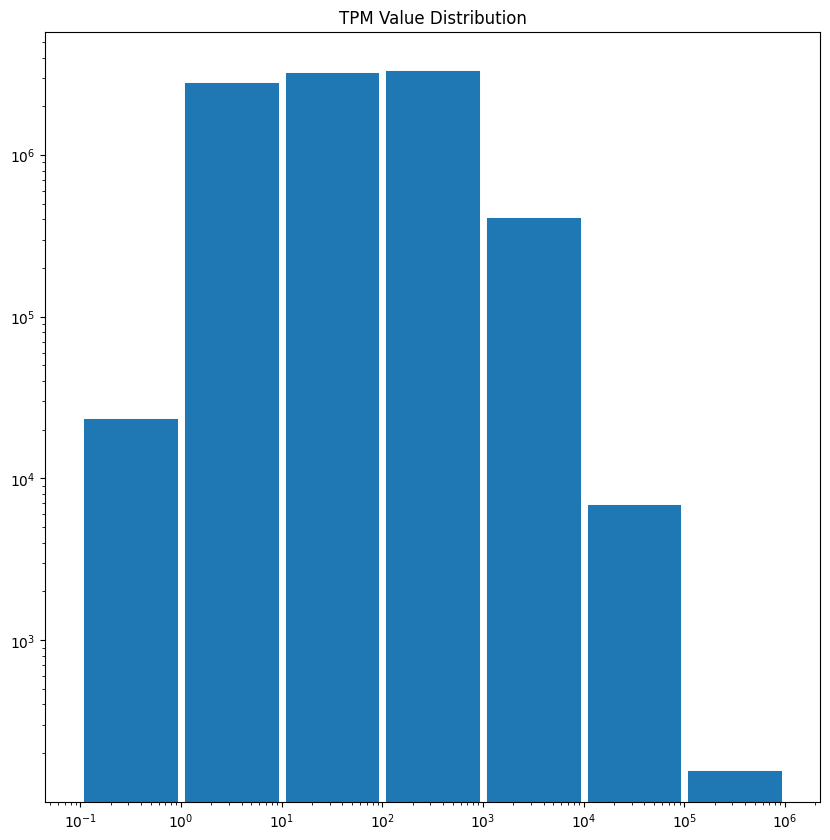

In [273]:
fig = plt.figure(figsize=(10,10))
plt.xscale('log')
plt.yscale('log')
plt.hist(npm_vals_alt, bins=[0.1, 1,10,100,1000,10000,100000,1000000], linewidth=5, edgecolor="white")
plt.title("TPM Value Distribution")
plt.show()

## Data for First Clustering

In [167]:
df_npm_normal = df_npm.applymap(lambda x : math.log(x/10+1,10))

In [168]:
df_npm_normal.head()

,GW08_PFC1_sc1,GW08_PFC1_sc2,GW08_PFC1_sc3,GW08_PFC1_sc4,GW08_PFC1_sc5,GW08_PFC1_sc6,GW08_PFC1_sc7,GW08_PFC1_sc8,GW08_PFC1_sc9,GW08_PFC1_sc11,...,GW23_PFC2_SF2_F25_sc41,GW23_PFC2_SF2_F25_sc42,GW23_PFC2_SF2_F25_sc43,GW23_PFC2_SF2_F25_sc44,GW23_PFC2_SF2_F25_sc45,GW23_PFC2_SF2_F25_sc46,GW23_PFC2_SF2_F25_sc47,GW23_PFC2_SF2_F25_sc48,GW23_PFC2_SF2_F25_sc49,GW23_PFC2_SF2_F25_sc50
A1BG,0.162564,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.717421,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
A1BG-AS1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
A1CF,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
A2M,0.162564,0.0,0.275772,0.0,1.945803,2.010219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.297104,0.0,0.122216,0.100371,0.0,0.0
A2M-AS1,0.000000,0.0,0.000000,0.0,0.086004,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [169]:
print(f"Min value: {df_npm_normal.values.min()}")
print(f"Max value: {df_npm_normal.values.max()}")

Min value: 0.0
Max value: 4.538738598696364


In [170]:
def filter_cells(df:pd.DataFrame) -> pd.DataFrame:
    filter_cells = df[df!=0].count()>1000
    qualified_cells = [i for i in filter_cells.index if filter_cells[i]]
    return df[qualified_cells]

def filter_genes(df:pd.DataFrame) -> pd.DataFrame:
    filter_genes = df[df>1].count(axis=1)>=3
    qualified_genes = [i for i in filter_genes.index if filter_genes[i]]
    return df.loc[qualified_genes]

In [171]:
df_npm_normal_qualified = filter_cells(filter_genes(filter_cells(filter_genes(df_npm_normal))))

In [172]:
df_npm_normal_qualified.shape

(16672, 2344)

In [173]:
df_npm_normal_qualified.to_csv('../data/data_filtered_for_first_clustering.csv')

## Data Labeling

In [174]:
label_dict = {
    "PAX6": "npcs",
    "NEUROD2": "excitatory",
    "GAD1": "inter",
    "PDGFRA": "opcs",
    "AQP4": "astrocytes",
    "PTPRC": "microglia",
}

In [191]:
df_label = df_npm_normal_qualified.loc[list(label_dict.keys())]

In [209]:
df_label.index = list(label_dict.values())
df_label

,GW08_PFC1_sc1,GW08_PFC1_sc2,GW08_PFC1_sc3,GW08_PFC1_sc4,GW08_PFC1_sc5,GW08_PFC1_sc6,GW08_PFC1_sc7,GW08_PFC1_sc8,GW08_PFC1_sc9,GW08_PFC1_sc11,...,GW23_PFC2_SF2_F25_sc41,GW23_PFC2_SF2_F25_sc42,GW23_PFC2_SF2_F25_sc43,GW23_PFC2_SF2_F25_sc44,GW23_PFC2_SF2_F25_sc45,GW23_PFC2_SF2_F25_sc46,GW23_PFC2_SF2_F25_sc47,GW23_PFC2_SF2_F25_sc48,GW23_PFC2_SF2_F25_sc49,GW23_PFC2_SF2_F25_sc50
npcs,0.940417,0.568905,1.066326,0.000000,0.000000,0.122871,1.529315,1.268882,0.000000,1.178459,...,1.679528,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.712734,0.198932,0.000000
excitatory,0.620968,2.027533,1.761920,0.260548,0.000000,0.122871,0.159567,1.173536,1.784874,0.000000,...,1.816394,0.000000,0.429268,0.0,0.297104,0.000000,0.000000,1.199289,0.438067,0.182700
inter,0.000000,1.741356,0.275772,0.000000,0.219060,0.000000,0.000000,0.000000,0.000000,0.357935,...,0.000000,2.014029,1.484528,0.0,2.382926,2.142812,0.217747,0.100371,2.028124,1.662418
opcs,0.620968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.355068,0.000000,0.000000,0.0,0.000000,0.000000,0.718502,0.000000,0.000000,0.000000
astrocytes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.312600,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
microglia,0.000000,0.000000,0.000000,0.000000,1.350907,1.327890,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.100371,0.000000,0.000000


In [210]:
# label 1, robust, if tpm_norm > 0, mark as true
df_label1 = df_label>0
df_label1 = df_label1.astype(int)
df_label1.to_csv('../data/data_label_1.csv')

In [224]:
# label 2, largest tpm, 1 type or no type
df_no_label = df_label.max()==0
no_label_cells = df_no_label[df_no_label].index
df_label2 = df_label.idxmax()
df_label2[no_label_cells] = 'unclear'
df_label2.name = 'type'
df_label2.to_csv('../data/data_label_2.csv')

In [266]:
df_label2.value_counts()

type
excitatory    1259
npcs           390
inter          360
opcs           129
unclear        106
microglia       58
astrocytes      42
Name: count, dtype: int64

<Axes: title={'center': 'Data Label Distribution'}, xlabel='type'>

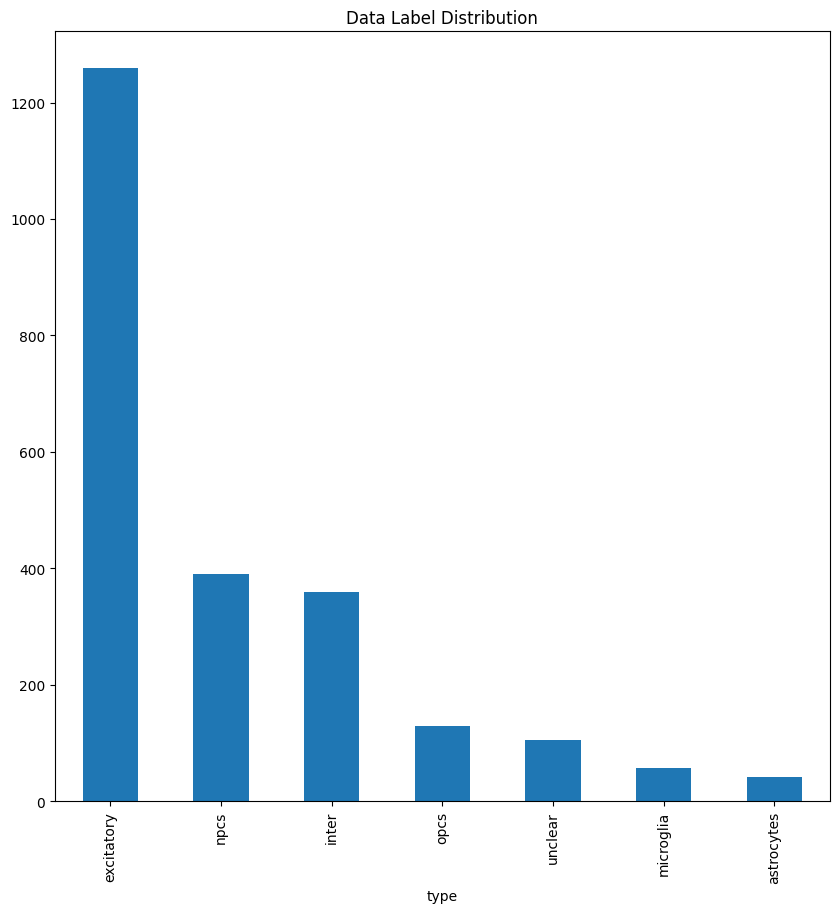

In [272]:
df_label2.value_counts().plot.bar(figsize=(10,10), title='Data Label Distribution')

## Data for Second Clustering

In [230]:
df_data_2 = df_npm_normal_qualified.copy(deep=True)
df_data_2.shape

(16672, 2344)

In [231]:
rmv_genes = ["PTPRC", "CSF1R", "AIF1"]
haemoglobin_genes = ["HBA1", "HBA2", "HBB", "HBD", "HBE1", "HBG1", "HBG2", "HBM", "HBQ1", "HBZ"]

In [232]:
df_data_2 = df_data_2.drop(rmv_genes)
df_data_2.shape

(16669, 2344)

In [257]:
df_haemoglobin = (df_data_2.loc[haemoglobin_genes]>1).astype(int).sum()>5
rmv_cells = df_haemoglobin[df_haemoglobin].index

In [259]:
df_data_2 = df_data_2.drop(rmv_cells, axis=1)
df_data_2.shape

(16669, 2209)

In [260]:
df_data_2 = df_data_2.drop(haemoglobin_genes)
df_data_2.to_csv('../data/data_filtered_for_second_clustering.csv')

In [274]:
df_data_2.shape

(16659, 2209)

## Subtype Data for Random Forest

In [292]:
df_data_3 = df_data_2.loc[list((df_data_2>0).astype(int).sum(axis=1).sort_values(ascending=False).iloc[:1000].index)]

In [293]:
df_data_3.to_csv('../data/data_filtered_for_subtype_clustering.csv')